In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import pandas as pd

# 1. Load each CSV. Adjust filenames if needed (e.g., add '.csv' extension if not present).
df_tracks = pd.read_csv("data.csv")             # main tracks file
df_by_artist = pd.read_csv("data_by_artist.csv")
df_by_genres = pd.read_csv("data_by_genres.csv")
df_by_year = pd.read_csv("data_by_year.csv")
df_w_genres = pd.read_csv("data_w_genres.csv")

# 2. Explore column names to choose join keys
print("Tracks columns:", df_tracks.columns)
print("W genres columns:", df_w_genres.columns)

# 3. Merge genres onto main data table if possible (commonly by 'id' or a similar field)
# If unsure of the column, print head of each to inspect
print(df_tracks.head())
print(df_w_genres.head())

# Example: Merge on 'id' if it exists in both
if 'id' in df_tracks.columns and 'id' in df_w_genres.columns:
    merged = pd.merge(df_tracks, df_w_genres[['id', 'genres']], on='id', how='left')
else:
    # Try 'track_name' as a backup if no id available (less precise)
    if 'track_name' in df_tracks.columns and 'track_name' in df_w_genres.columns:
        merged = pd.merge(df_tracks, df_w_genres[['track_name', 'genres']], on='track_name', how='left')
    else:
        merged = df_tracks  # Fallback: use tracks data only

# 4. Save the merged table for clustering analysis
merged.to_csv("spotify_clustering_ready.csv", index=False)
print("Merged file saved as spotify_clustering_ready.csv")

# 5. (Optional) Preview your final data
print(merged.shape)
print(merged.head())


Tracks columns: Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
W genres columns: Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngay

In [33]:
merged

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [34]:
df = merged

In [35]:
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [37]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [38]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [39]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler

# List of audio features suitable for clustering
feature_cols = [
    'danceability', 'energy', 'acousticness', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'duration_ms'
]

# Extract only these features
X = df[feature_cols]

# Scale features for fair distance comparisons
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaled data for later steps (optional)
import numpy as np
np.save("spotify_X_scaled.npy", X_scaled)

# Preview the result
print("Scaled matrix shape:", X_scaled.shape)
print("First 5 rows (scaled):\n", X_scaled[:5])


Scaled matrix shape: (170653, 10)
First 5 rows (scaled):
 [[-1.46701268 -1.01398836  1.27618658  2.2681019   2.6267188  -1.51423687
  -0.37970638 -1.7828247  -1.16930675  4.76314621]
 [ 1.59877887 -0.5282702   0.61134711 -0.53277054 -0.26222865 -0.17076563
   1.94548067  1.65068832 -1.82117959 -0.399747  ]
 [-1.18882049 -1.18212158  1.22034007  2.37975399 -0.59974924 -0.59355103
  -0.3962973  -1.858821   -0.21240379  2.13382382]
 [-1.48972225 -0.64783159  1.23629621 -0.53268217  1.0020434   0.37767952
  -0.38708012 -1.38156421 -0.54553693 -0.16610082]
 [-0.67785523 -1.08124165  1.20970264 -0.53276518  0.13249883  0.24078761
  -0.37110368 -1.04718047 -0.49486682 -0.50948546]]


Variance explained by 2 PCs: 45.84%


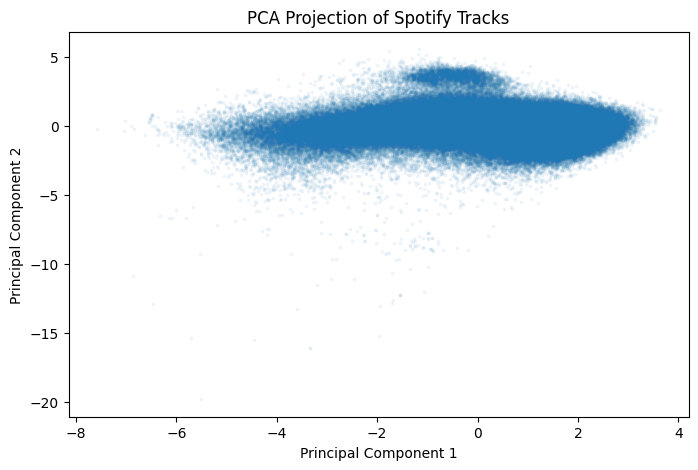

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Do PCA for visualization and clustering prep
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_.sum()
print(f"Variance explained by 2 PCs: {explained_var:.2%}")

# Scatter plot, one point per track
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.05, s=3)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Spotify Tracks")
plt.show()


In [42]:
pca = PCA(n_components=10)  # or choose number explaining ~80% variance
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_.cumsum()
print(f"Cumulative explained variance by 10 PCs: {explained_var[-1]:.2%}")


Cumulative explained variance by 10 PCs: 100.00%


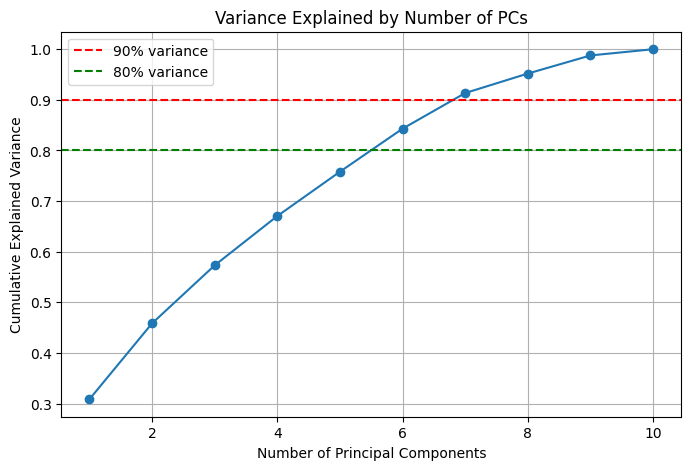

Components for >=80% variance: 6
Components for >=90% variance: 7


In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA to all scaled features
pca_full = PCA().fit(X_scaled)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(0.90, color='red', ls='--', label='90% variance')
plt.axhline(0.80, color='green', ls='--', label='80% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by Number of PCs')
plt.legend()
plt.grid(True)
plt.show()

# Print # of components needed for 80% and 90% variance
n_80 = np.argmax(explained_var >= 0.80) + 1
n_90 = np.argmax(explained_var >= 0.90) + 1
print(f"Components for >=80% variance: {n_80}")
print(f"Components for >=90% variance: {n_90}")


In [44]:
df.shape

(170653, 19)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [46]:
# 1. Apply PCA with 6 components
pca = PCA(n_components=6, random_state=42)
X_pca6 = pca.fit_transform(X_scaled)  # X_scaled was created in earlier step

In [47]:
# 2. Print explained variance for these 6 components
explained_var = pca.explained_variance_ratio_.sum()
print(f"Total variance explained by 6 PCs: {explained_var:.2%}")

Total variance explained by 6 PCs: 84.30%


In [48]:
# 3. Evaluate K-Means for k=2 to k=10 using all metrics
sse, silhouette, dbi, ch = [], [], [], []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca6)then 
    sse.append(km.inertia_)
    silhouette.append(silhouette_score(X_pca6, labels))
    dbi.append(davies_bouldin_score(X_pca6, labels))
    ch.append(calinski_harabasz_score(X_pca6, labels))
    print(f"k={k}: Silhouette={silhouette[-1]:.3f}, CH={ch[-1]:.1f}, DB={dbi[-1]:.3f}")

k=2: Silhouette=0.266, CH=58557.3, DB=1.545
k=3: Silhouette=0.290, CH=47313.4, DB=1.225
k=4: Silhouette=0.196, CH=42493.0, DB=1.458
k=5: Silhouette=0.211, CH=40205.4, DB=1.380
k=6: Silhouette=0.196, CH=38926.7, DB=1.421
k=7: Silhouette=0.201, CH=37828.0, DB=1.398
k=8: Silhouette=0.204, CH=36488.1, DB=1.334
k=9: Silhouette=0.195, CH=35160.0, DB=1.328
k=10: Silhouette=0.195, CH=33935.1, DB=1.321
